# MEDICAL COST INSURANCE ANALYSIS 

In [23]:
 import numpy as np
 import pandas as pd
 import matplotlib.pyplot as pl
 import seaborn as sns
 import warnings
 warnings.filterwarnings('ignore')
 import os

In [24]:
 df = pd.read_csv("insurance.csv")
 df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [25]:
df.tail(5)

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [26]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [27]:
df.count()

age         1338
sex         1338
bmi         1338
children    1338
smoker      1338
region      1338
charges     1338
dtype: int64

In [28]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [29]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [30]:
df2 = df.copy()

In [31]:
df2

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [32]:
df2.duplicated().value_counts()

False    1337
True        1
Name: count, dtype: int64

In [33]:
 from sklearn.preprocessing import LabelEncoder

In [34]:
le = LabelEncoder()

le.fit(df2.sex.drop_duplicates())
df2.sex = le.transform(df2.sex)


# smoker or not
le.fit(df2.smoker.drop_duplicates())
df2.smoker = le.transform(df2.smoker)


#region
le.fit(df2.region.drop_duplicates())
df2.region = le.transform(df2.region)

In [35]:
df2

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [36]:
df2.corr()['charges'].sort_values()

region     -0.006208
sex         0.057292
children    0.067998
bmi         0.198341
age         0.299008
smoker      0.787251
charges     1.000000
Name: charges, dtype: float64

<Axes: >

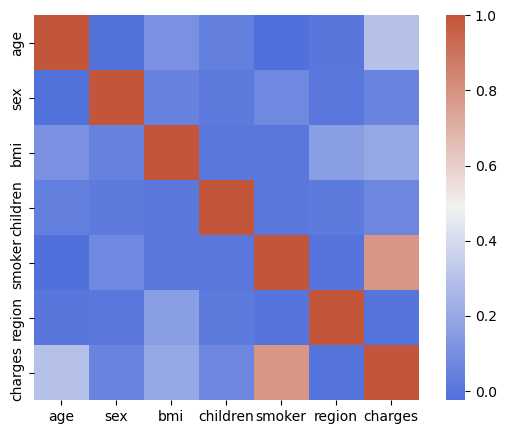

In [40]:
 f, ax = pl.subplots(figsize=(7, 5))
 corr = df2.corr()
 sns.heatmap(corr, mask=np.zeros_like(corr, dtype=bool), cmap=sns.diverging_palette(260 ,20,as_cmap=True),
 square=True, ax=ax)

Text(0.5, 1.0, 'Distribution of charges for non-smokers')

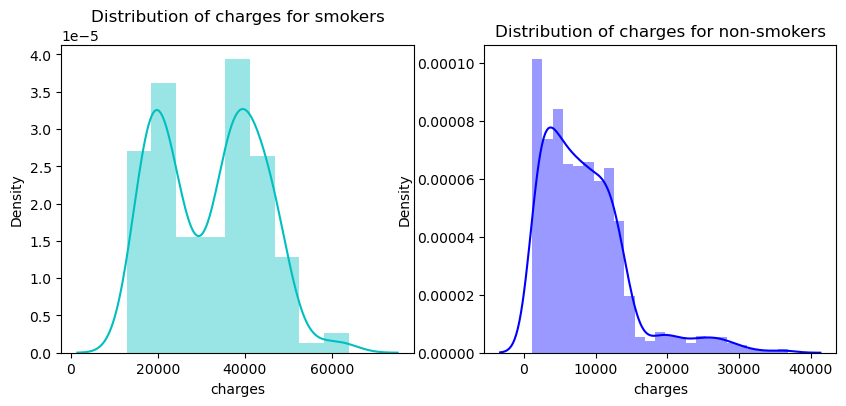

In [45]:
 f= pl.figure(figsize=(10,4))
 ax=f.add_subplot(121)

 sns.distplot(df2[(df2.smoker == 1)]["charges"],color='c',ax=ax)
 ax.set_title('Distribution of charges for smokers')

 ax=f.add_subplot(122)
 sns.distplot(df2[(df2.smoker == 0)]['charges'],color='b',ax=ax)

 ax.set_title('Distribution of charges for non-smokers')

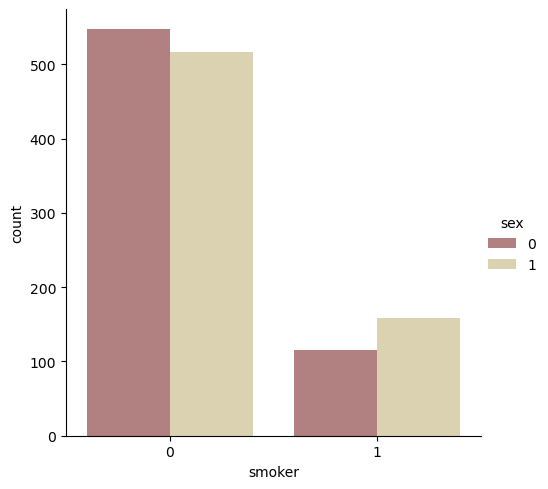

In [46]:
 sns.catplot(x="smoker", kind="count",hue = 'sex', palette="pink", data=df2)

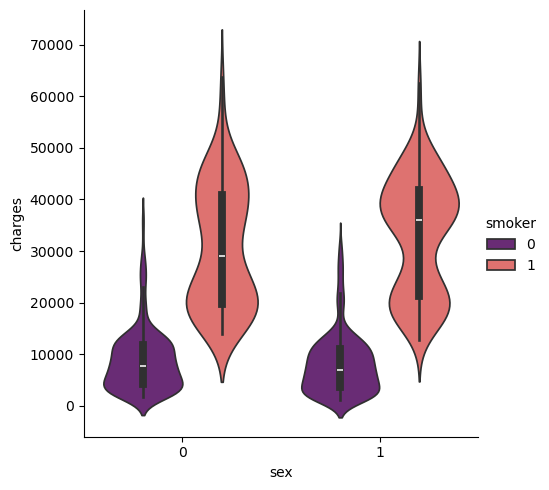

In [47]:
 sns.catplot(x="sex", y="charges", hue="smoker",
 kind="violin", data=df2, palette = 'magma')

<Axes: title={'center': 'Box plot for charges of women'}, xlabel='charges', ylabel='smoker'>

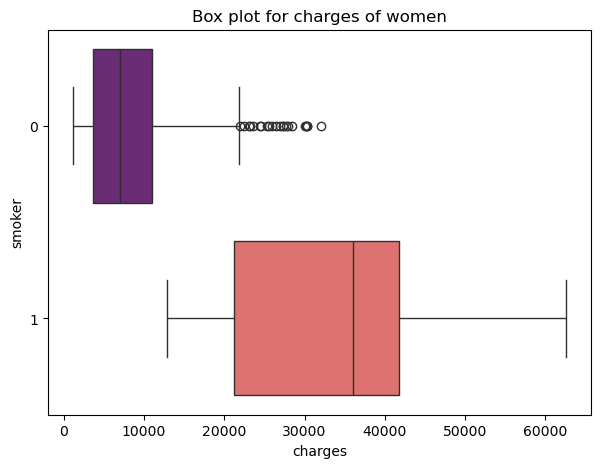

In [50]:
pl.figure(figsize=(7,5))
pl.title("Box plot for charges of women")
sns.boxplot(y="smoker", x="charges", data = df2[(df2.sex == 1)] , orient="h", palette = 'magma')

<Axes: title={'center': 'Box plot for charges of men'}, xlabel='charges', ylabel='smoker'>

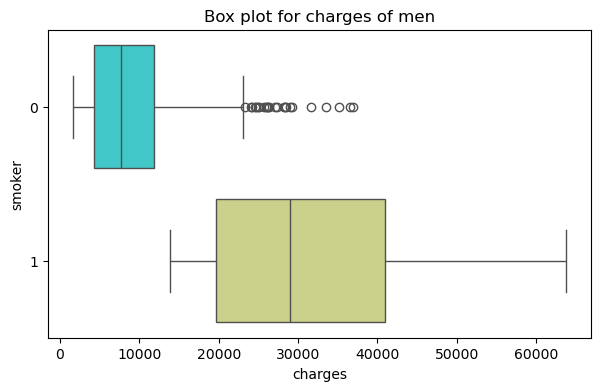

In [52]:
pl.figure(figsize=(7,4))
pl.title("Box plot for charges of men")
sns.boxplot(y="smoker", x="charges", data = df2[(df2.sex == 0)] , orient="h", palette = 'rainbow')

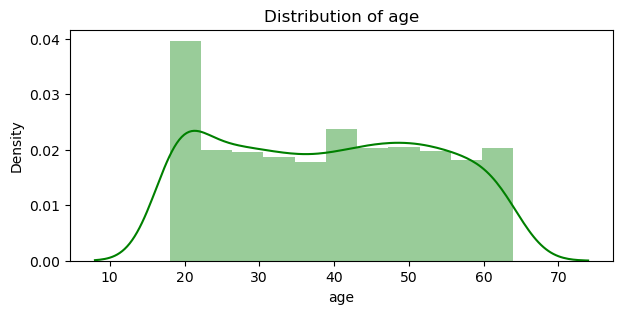

In [53]:
pl.figure(figsize=(7,3))
pl.title("Distribution of age")
ax = sns.distplot(df2["age"], color = 'g')

Text(0.5, 1.0, 'Smokers and non-smokers')

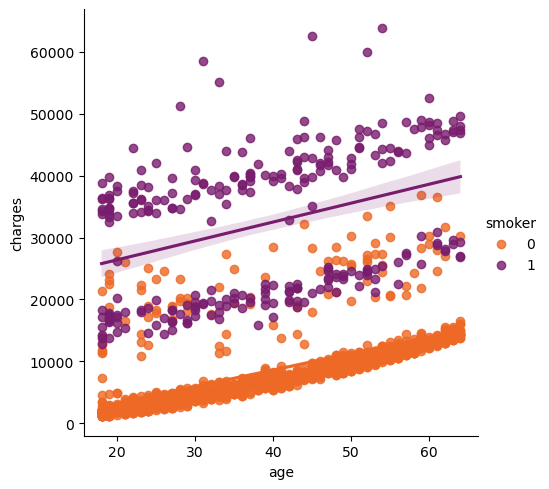

In [56]:
sns.lmplot(x="age", y="charges", hue="smoker", data=df2, palette = 'inferno_r')
ax.set_title('Smokers and non-smokers')

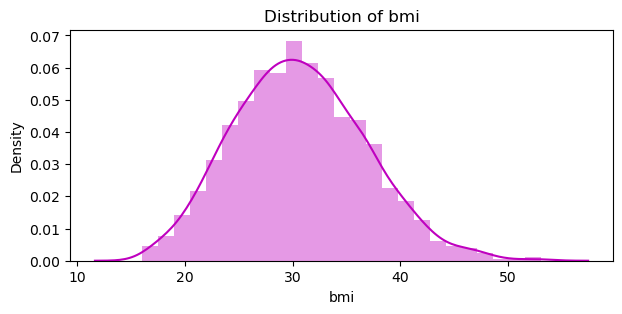

In [57]:
pl.figure(figsize=(7,3))
pl.title("Distribution of bmi")
ax = sns.distplot(df2["bmi"], color = 'm')

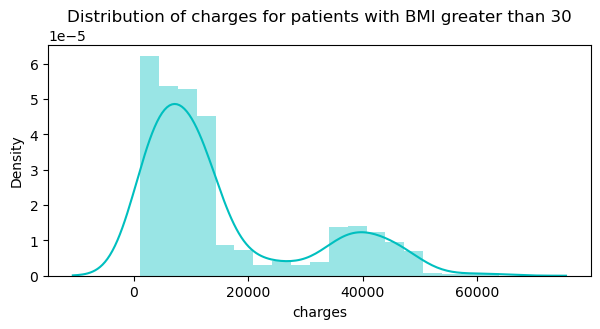

In [58]:
pl.figure(figsize=(7,3))
pl.title("Distribution of charges for patients with BMI greater than 30")
ax = sns.distplot(df2[(df2.bmi >= 30)]['charges'], color = 'c')

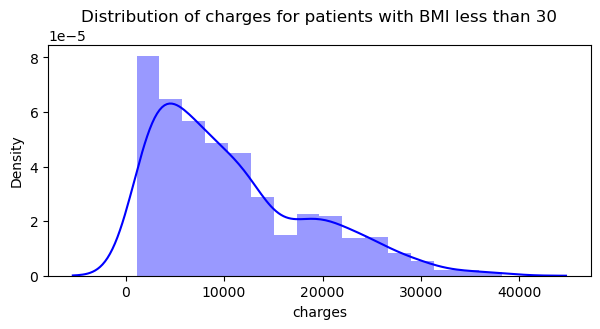

In [59]:
pl.figure(figsize=(7, 3))
pl.title("Distribution of charges for patients with BMI less than 30")
ax = sns.distplot(df2[(df2.bmi < 30)]['charges'], color = 'b')

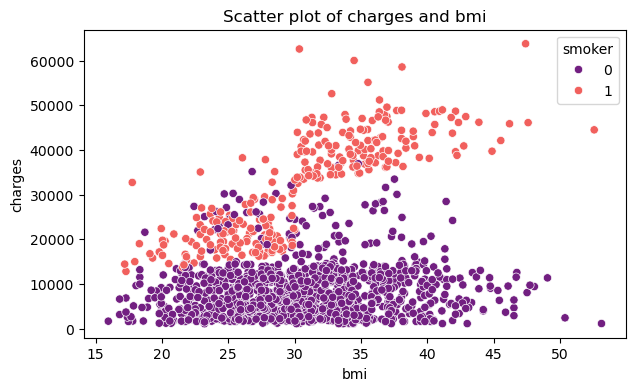

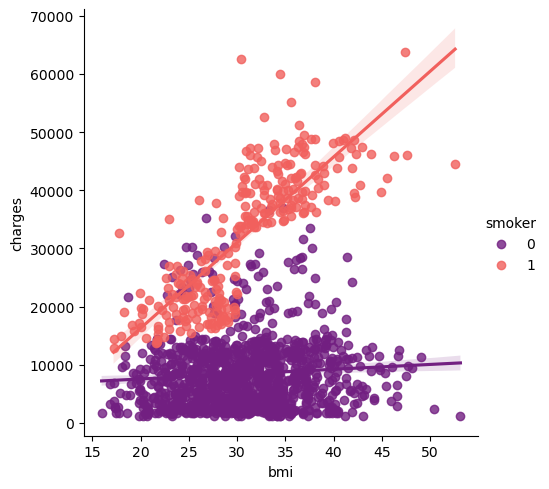

In [60]:
pl.figure(figsize=(7,4))
ax = sns.scatterplot(x='bmi',y='charges',data=df2, palette='magma',hue='smoker')
ax.set_title('Scatter plot of charges and bmi')
sns.lmplot(x="bmi", y="charges", hue="smoker", data=df2, palette = 'magma')

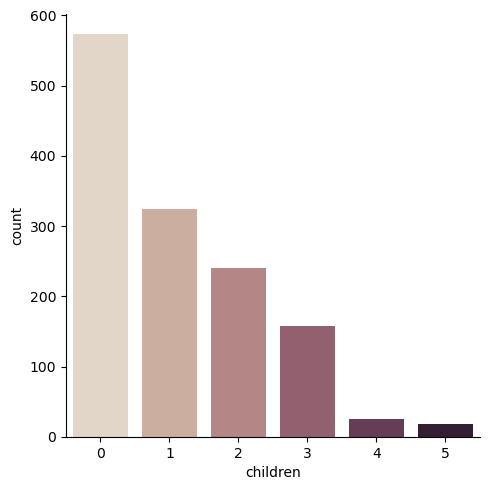

In [61]:
sns.catplot(x="children", kind="count", palette="ch:.25", data=df2)

Text(0.5, 1.0, 'Smokers and non-smokers who have childrens')

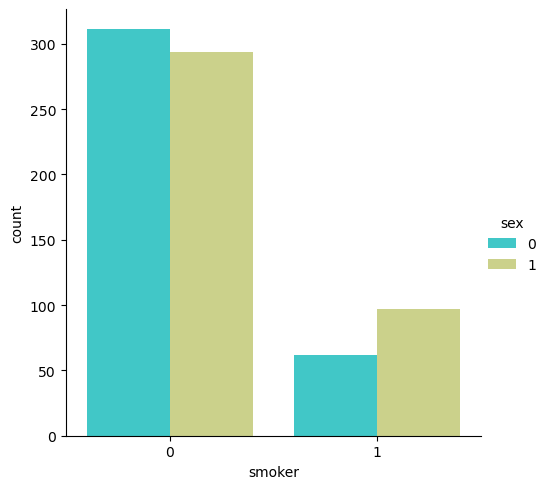

In [62]:
sns.catplot(x="smoker", kind="count", palette="rainbow",hue = "sex", 
            data=df2[(df2.children > 0)])
ax.set_title('Smokers and non-smokers who have childrens')

In [63]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.ensemble import RandomForestRegressor

In [64]:
x = df2.drop(['charges'], axis = 1)
y = df2.charges

x_train,x_test,y_train,y_test = train_test_split(x,y, random_state = 0)
lr = LinearRegression().fit(x_train,y_train)

y_train_pred = lr.predict(x_train)
y_test_pred = lr.predict(x_test)

print(lr.score(x_test,y_test))

0.7962732059725786


In [65]:
X = df2.drop(['charges','region'], axis = 1)
Y = df2.charges

quad = PolynomialFeatures (degree = 2)

x_quad = quad.fit_transform(X)
X_train,X_test,Y_train,Y_test = train_test_split(x_quad,Y, random_state = 0)
plr = LinearRegression().fit(X_train,Y_train)
Y_train_pred = plr.predict(X_train)


Y_test_pred = plr.predict(X_test)

print(plr.score(X_test,Y_test))

0.884919734414723
